Firstly, I try to do an algorithm solving for a 2d space with only one solution (1 peak).

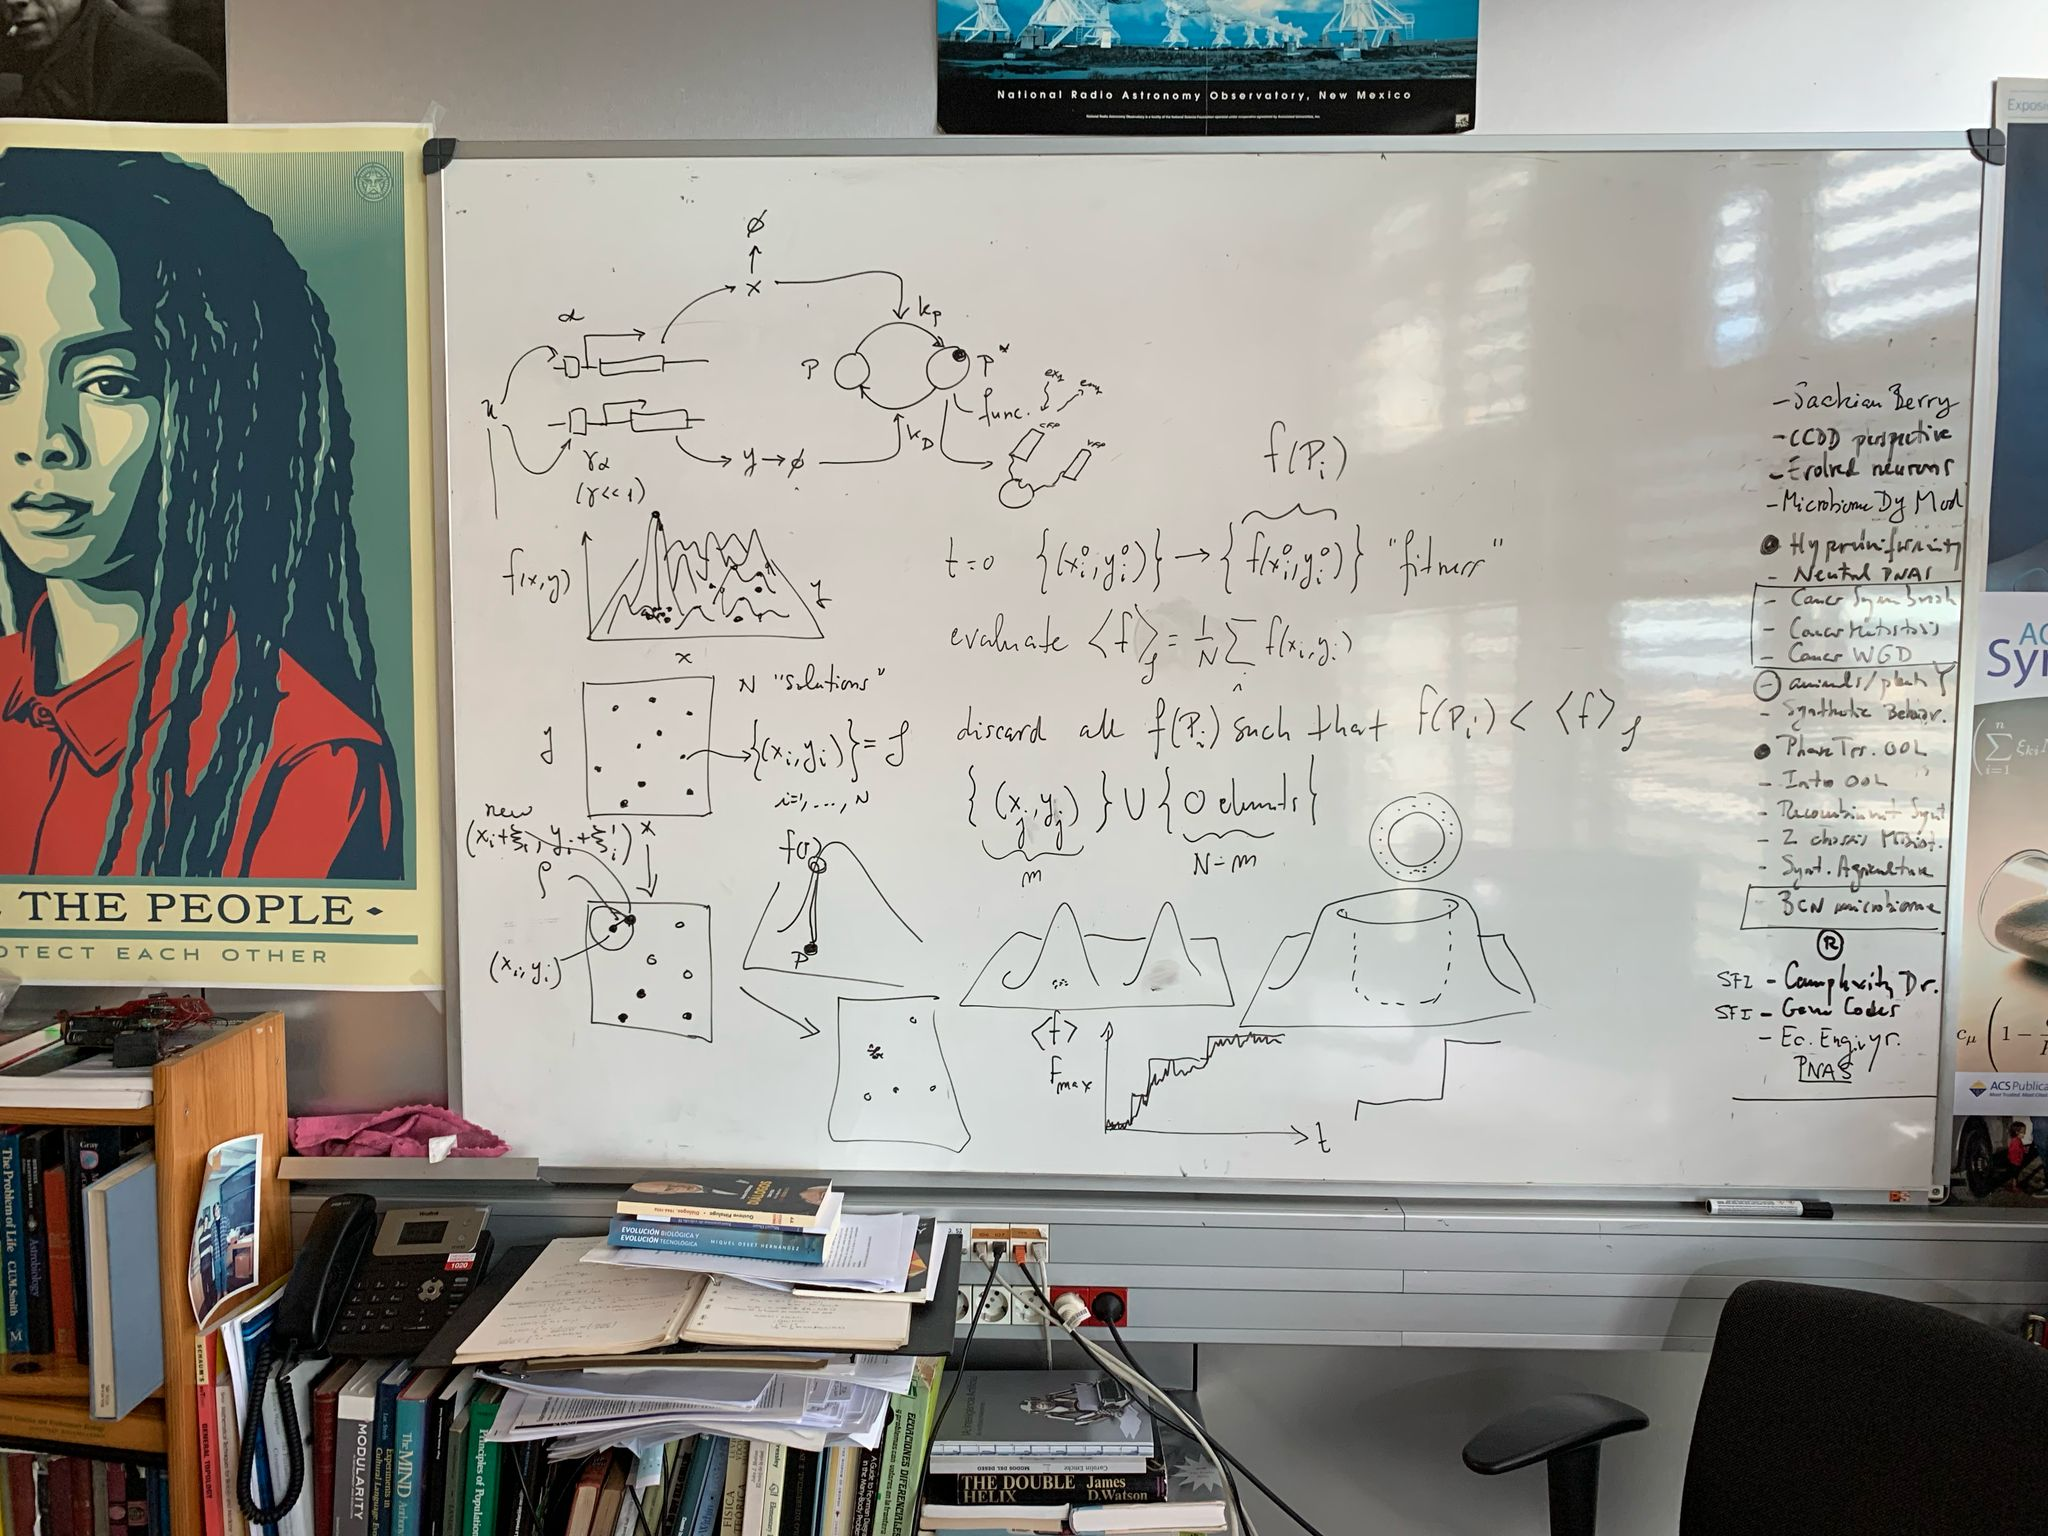

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm   # colormap
from matplotlib.ticker import LinearLocator     # for having ticks evenly spaced on the axis
from mpl_toolkits.mplot3d import Axes3D

import evolutionary_programming as ep

In [2]:
def f(x,y):
    return np.exp(-0.1*(x)**2 - 0.1*(y)**2)

In [3]:
par = {'N': 100,
       'coord_range': np.array([0,10]),
       'sol_ratio': 1/5,
       'mutation_ratio': 1/20,
       'seed': 12345,
       'n_iter': 100}

func_par = {'alphas': np.random.uniform(0.,2.,50),
            'offsetsx': np.random.uniform(0.,10.,50),
            'offsetsy':np.random.uniform(0.,10.,50)}

def f(x,y,func_par:dict):
       alphas, offsetsx, offsetsy = func_par['alphas'], func_par['offsetsx'], func_par['offsetsy']
       f = np.zeros((x.shape))
       for i in range(len(alphas)):
              f += alphas[i] * np.exp(-(x-offsetsx[i])**2-(y-offsetsy[i])**2)     
       return f / np.max(f)

In [4]:
coord_range = par['coord_range']
N = par['N']
x = np.linspace(coord_range[0],coord_range[1],N)
y = np.linspace(coord_range[0],coord_range[1],N)
X,Y = np.meshgrid(x,y)

f(x,y,func_par).shape

(100,)

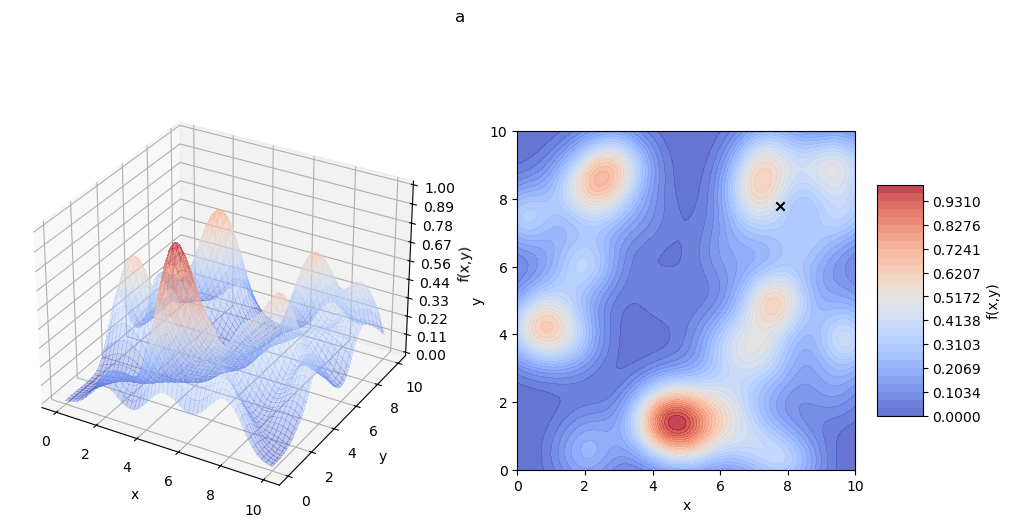

In [5]:
title = 'a'
coord_range = par['coord_range']
N = par['N']
x = np.linspace(coord_range[0],coord_range[1],N)
y = np.linspace(coord_range[0],coord_range[1],N)
X,Y = np.meshgrid(x,y)

fig= plt.figure(figsize=(12,6))
fig.suptitle(title)

# First subplot (3d view)
ax = fig.add_subplot(1,2,1,projection='3d')
surf = ax.plot_surface(X, Y, f(X,Y,func_par), cmap=cm.coolwarm, linewidth=0, antialiased=False,alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_zlim(0.0)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')


# Second subplot (2d view)
ax = fig.add_subplot(1,2,2)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
levels = np.linspace(0,np.max(f(x,y,func_par)),30)
contour = ax.contourf(X,Y,f(X,Y,func_par),cmap=cm.coolwarm, antialiased=False,levels=levels,alpha=0.8)
ax.scatter(X[np.argmax(f(X,Y,func_par)[0]),np.argmax(f(X,Y,func_par)[0])],Y[np.argmax(f(X,Y,func_par)[0]),np.argmax(f(X,Y,func_par)[0])],marker='x',c='black',label='f_max')
# Add a color bar which maps values to colors.
fig.colorbar(contour, shrink=0.5, aspect=5,label='f(x,y)')

plt.show()

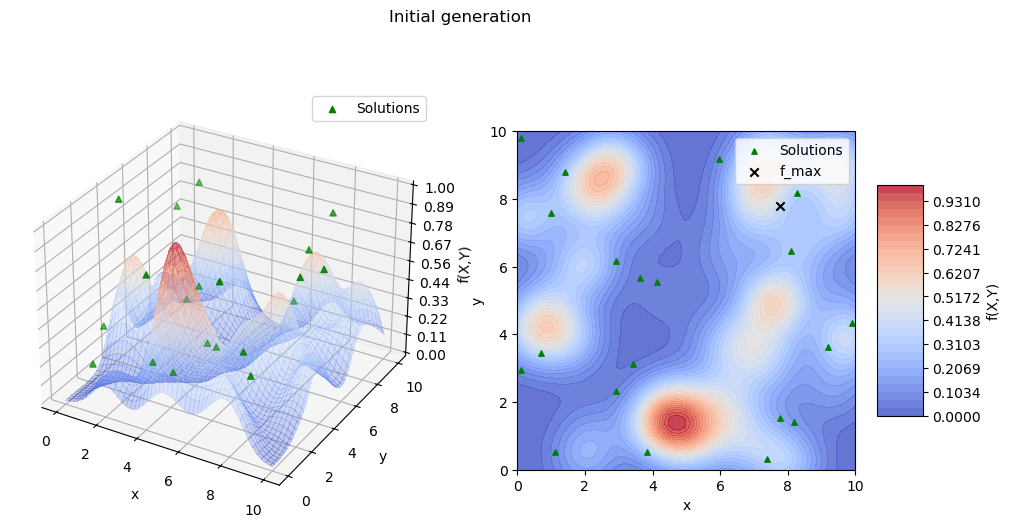

Iteration #0
(9, 2)
(11, 2)
Iteration #1
(9, 2)
(11, 2)
Iteration #2
(6, 2)
(14, 2)
Iteration #3
(9, 2)
(11, 2)
Iteration #4
(12, 2)
(8, 2)
Iteration #5
(13, 2)
(7, 2)
Iteration #6
(10, 2)
(10, 2)
Iteration #7
(10, 2)
(10, 2)
Iteration #8
(11, 2)
(9, 2)
Iteration #9
(15, 2)
(5, 2)
Iteration #10
(9, 2)
(11, 2)
Iteration #11
(13, 2)
(7, 2)
Iteration #12
(14, 2)
(6, 2)
Iteration #13
(15, 2)
(5, 2)
Iteration #14
(14, 2)
(6, 2)
Iteration #15
(15, 2)
(5, 2)
Iteration #16
(15, 2)
(5, 2)
Iteration #17
(13, 2)
(7, 2)
Iteration #18
(14, 2)
(6, 2)
Iteration #19
(17, 2)
(3, 2)
Iteration #20
(14, 2)
(6, 2)
Iteration #21
(15, 2)
(5, 2)
Iteration #22
(17, 2)
(3, 2)
Iteration #23
(15, 2)
(5, 2)
Iteration #24
(15, 2)
(5, 2)
Iteration #25
(16, 2)
(4, 2)
Iteration #26
(16, 2)
(4, 2)
Iteration #27
(15, 2)
(5, 2)
Iteration #28
(15, 2)
(5, 2)
Iteration #29
(17, 2)
(3, 2)
Iteration #30
(17, 2)
(3, 2)
Iteration #31
(18, 2)
(2, 2)
Iteration #32
(18, 2)
(2, 2)
Iteration #33
(17, 2)
(3, 2)
Iteration #34
(17, 2)


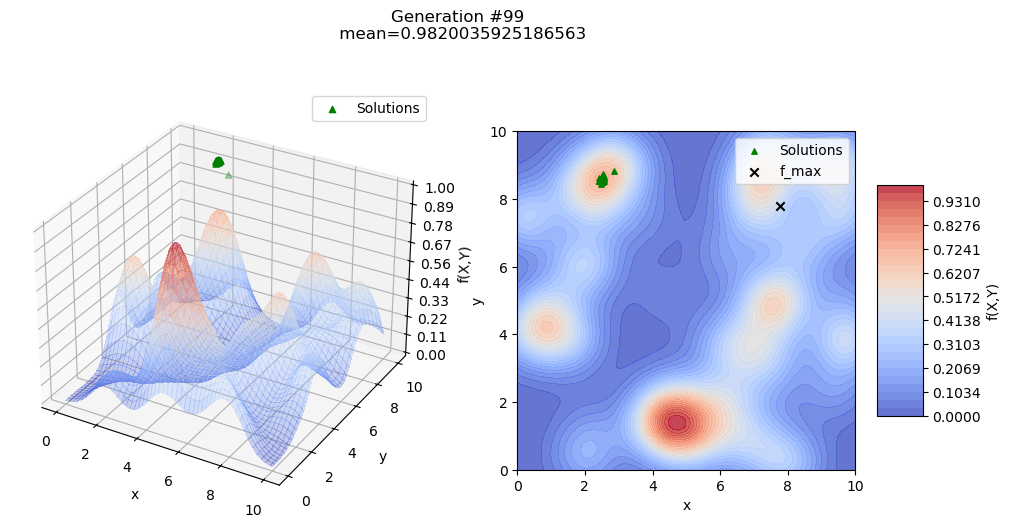

In [6]:
mean_ev, max_ev = ep.ep2d(f,par,func_par=func_par)

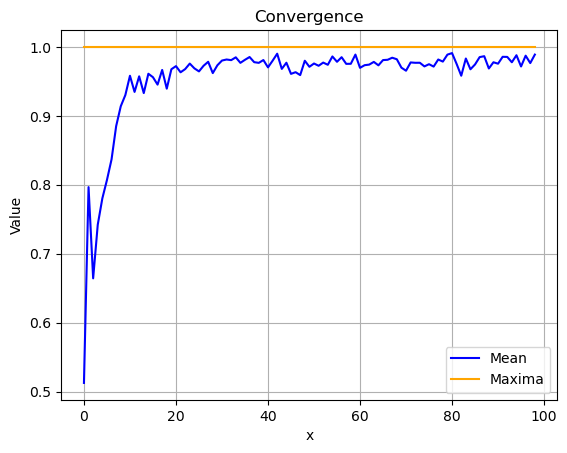

In [7]:
plt.plot(mean_ev,c='b',label='Mean')
plt.plot(max_ev,c='orange',label='Maxima')
plt.legend()
plt.grid(True)
plt.title('Convergence')
plt.ylabel('Value')
plt.xlabel('x')
plt.show()